# Image Classification with CNN using Keras

# Task 1: Import Libraries

In [1]:
!pip install tensorflow

     ---------------------------------------- 0.0/57.5 kB ? eta -:--:--
     --------------------- ------------------ 30.7/57.5 kB 1.3 MB/s eta 0:00:01
     --------------------- ------------------ 30.7/57.5 kB 1.3 MB/s eta 0:00:01
     -------------------------------------- 57.5/57.5 kB 429.4 kB/s eta 0:00:00
     ---------------------------------------- 0.0/65.5 kB ? eta -:--:--
     ---------------------------------------- 65.5/65.5 kB 1.8 MB/s eta 0:00:00
  Using cached wheel-0.42.0-py3-none-any.whl.metadata (2.2 kB)
   ---------------------------------------- 0.0/300.9 MB ? eta -:--:--
   ---------------------------------------- 0.1/300.9 MB 3.3 MB/s eta 0:01:32
   ---------------------------------------- 0.1/300.9 MB 1.2 MB/s eta 0:04:09
   ---------------------------------------- 0.3/300.9 MB 1.8 MB/s eta 0:02:45
   ---------------------------------------- 0.3/300.9 MB 1.8 MB/s eta 0:02:50
   ---------------------------------------- 0.3/300.9 MB 1.8 MB/s eta 0:02:50
   ---------


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


   ---------------- --------------------- 128.5/300.9 MB 486.4 kB/s eta 0:05:55
   ---------------- --------------------- 128.5/300.9 MB 485.3 kB/s eta 0:05:56
   ---------------- --------------------- 128.5/300.9 MB 485.3 kB/s eta 0:05:56
   ---------------- --------------------- 128.5/300.9 MB 483.5 kB/s eta 0:05:57
   ---------------- --------------------- 128.5/300.9 MB 483.2 kB/s eta 0:05:57
   ---------------- --------------------- 128.5/300.9 MB 483.2 kB/s eta 0:05:57
   ---------------- --------------------- 128.5/300.9 MB 481.7 kB/s eta 0:05:58
   ---------------- --------------------- 128.5/300.9 MB 481.1 kB/s eta 0:05:59
   ---------------- --------------------- 128.5/300.9 MB 480.3 kB/s eta 0:05:59
   ---------------- --------------------- 128.6/300.9 MB 479.6 kB/s eta 0:06:00
   ---------------- --------------------- 128.6/300.9 MB 479.6 kB/s eta 0:06:00
   ---------------- --------------------- 128.6/300.9 MB 478.2 kB/s eta 0:06:01
   ---------------- --------------------

In [1]:
import tensorflow as tf
import os
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

if not os.path.isdir('models'):
    os.mkdir('models')
    
print('TensorFlow version:', tf.__version__)
print('Is using GPU?', tf.test.is_gpu_available())


TensorFlow version: 2.15.0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
Is using GPU? False


# Task 2: Preprocess Data

In [2]:
def get_three_classes(x, y):
    indices_0, _ = np.where(y == 0.)
    indices_1, _ = np.where(y == 1.)
    indices_2, _ = np.where(y == 2.)

    indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)
    
    x = x[indices]
    y = y[indices]
    
    count = x.shape[0]
    indices = np.random.choice(range(count), count, replace=False)
    
    x = x[indices]
    y = y[indices]
    
    y = tf.keras.utils.to_categorical(y)
    
    return x, y

In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

x_train, y_train = get_three_classes(x_train, y_train)
x_test, y_test = get_three_classes(x_test, y_test)

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(15000, 32, 32, 3) (15000, 3) (3000, 32, 32, 3) (3000, 3)


### Let's understand the get_three_classes function

In [4]:
x = x_train
y = y_train

indices_0, _ = np.where(y == 0.)
indices_1, _ = np.where(y == 1.)
indices_2, _ = np.where(y == 2.)

print(f" {indices_0} \n {indices_1} \n {indices_2}")

indices = np.concatenate([indices_0, indices_1, indices_2], axis=0)

print(indices)

x = x[indices]
y = y[indices]
    
count = x.shape[0]
print(count)
indices = np.random.choice(range(count), count, replace=False)
print(indices)
x = x[indices]
y = y[indices]
print(y)
y = tf.keras.utils.to_categorical(y)
print(y)

 [    0     0     1 ... 14998 14999 14999] 
 [    0     1     2 ... 14997 14998 14999] 
 []
[    0     0     1 ... 14997 14998 14999]
45000
[32514  8834 16529 ... 18667  8777  3945]
[[0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[[1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]
  [1. 0.]]

 ...

 [[1. 0.]
  [1. 0.]
  [0. 1.]]

 [[1. 0.]
  [0. 1.]
  [1. 0.]]

 [[1. 0.]
  [1. 0.]
  [0. 1.]]]


# Task 3: Visulize Examples

In [6]:
class_names = ['aeroplane', 'car', 'bird']

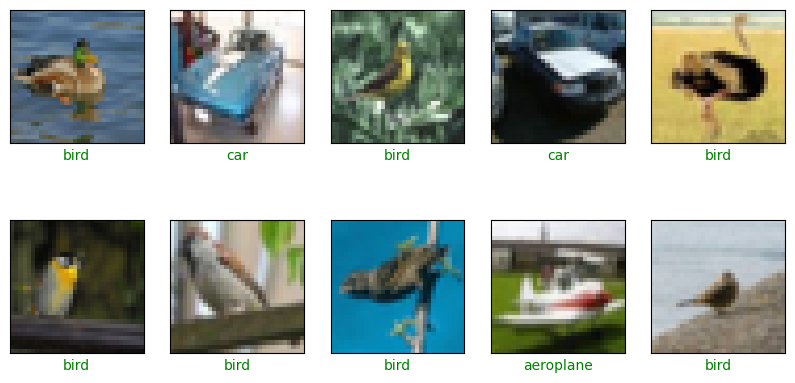

In [7]:
def show_random_examples(x, y, p):
    indices = np.random.choice(range(x.shape[0]), 10, replace=False)
    
    x = x[indices]
    y = y[indices]
    p = p[indices]
    
    plt.figure(figsize=(10, 5))
    for i in range(10):
        plt.subplot(2,5,1+i)
        plt.imshow(x[i])
        plt.xticks([])
        plt.yticks([])
        col = 'green' if np.argmax(y[i]) == np.argmax(p[i]) else 'red'
        plt.xlabel(class_names[np.argmax(p[i])], color = col)
    plt.show()

show_random_examples(x_train, y_train, y_train)

# Task 4: Create Model

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

In [9]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense

def create_model():
    def add_conv_block(model, num_filters):
        model.add(Conv2D(num_filters, 3, activation= 'relu', padding='same'))
        model.add(BatchNormalization())
        model.add(Conv2D(num_filters, 3, activation= 'relu'))
        model.add(MaxPooling2D(pool_size=2))
        model.add(Dropout(0.5))
        return model
    
    model = tf.keras.models.Sequential()
    model.add(Input(shape=(32,32,3)))
    
    model=add_conv_block(model, 32)
    model=add_conv_block(model, 64)
    model=add_conv_block(model, 128)
    
    model.add(Flatten())
    model.add(Dense(3, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer= 'adam', metrics=['accuracy'])
    
    return model

model = create_model()
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (Batch  (None, 32, 32, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)      

# Task 5: Train the Model

In [10]:
h = model.fit(x_train/255,
             y_train, validation_data = (x_test/255, y_test),
             epochs = 10, batch_size=128,
             callbacks=[
                 tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                 tf.keras.callbacks.ModelCheckpoint("models/model_{val_accuracy:.3f}.h5",
                                                   save_best_only=True, save_weights_only=False,
                                                   monitor='val_accuracy')
             ])

Epoch 1/10


118/118 [==============================] - ETA: 0s - loss: 0.8817 - accuracy: 0.6808

c:\Users\Muhammad Nouman\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


118/118 [==============================] - 26s 166ms/step - loss: 0.8817 - accuracy: 0.6808 - val_loss: 2.5348 - val_accuracy: 0.3333
Epoch 2/10
118/118 [==============================] - 25s 210ms/step - loss: 0.5449 - accuracy: 0.7826 - val_loss: 2.0705 - val_accuracy: 0.4590
Epoch 3/10
118/118 [==============================] - 27s 226ms/step - loss: 0.4924 - accuracy: 0.8019 - val_loss: 2.0406 - val_accuracy: 0.5130
Epoch 4/10
118/118 [==============================] - 28s 239ms/step - loss: 0.4437 - accuracy: 0.8239 - val_loss: 1.2855 - val_accuracy: 0.5660
Epoch 5/10
118/118 [==============================] - 27s 228ms/step - loss: 0.3959 - accuracy: 0.8453 - val_loss: 0.5430 - val_accuracy: 0.7853
Epoch 6/10
118/118 [==============================] - 27s 227ms/step - loss: 0.3790 - accuracy: 0.8530 - val_loss: 0.4791 - val_accuracy: 0.8197
Epoch 7/10
118/118 [==============================] - 27s 228ms/step - loss: 0.3405 - accuracy: 0.8678 - val_loss: 1.1639 - val_accuracy: 0.6

# Task 6: Final Predictions

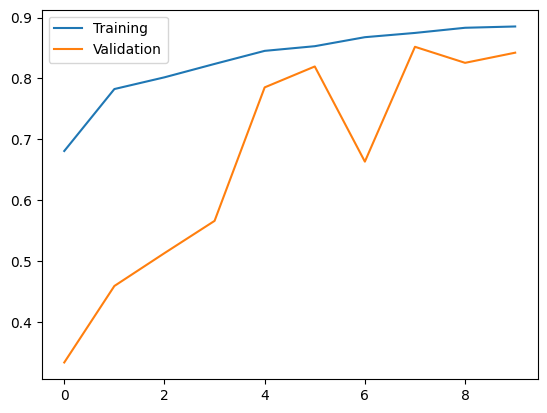

In [12]:
accs = h.history['accuracy']
val_accs = h.history['val_accuracy']

plt.plot(range(len(accs)),accs, label='Training')
plt.plot(range(len(accs)),val_accs, label='Validation')
plt.legend()
plt.show()

In [13]:
model = tf.keras.models.load_model('models/model_0.852.h5')

94/94 [==============================] - 2s 19ms/step


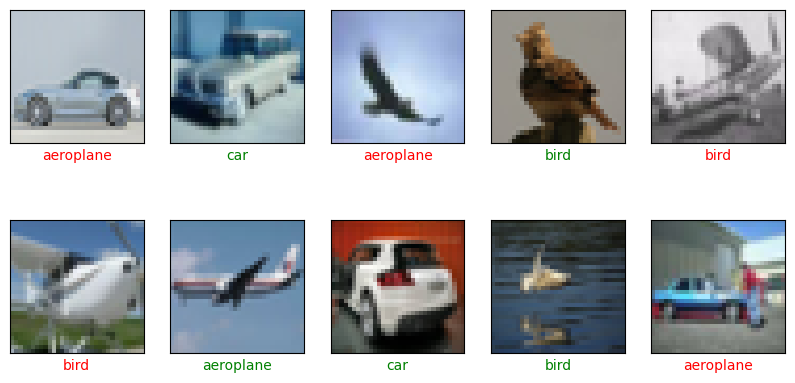

In [14]:
preds = model.predict(x_test/255)
show_random_examples(x_test, y_test, preds)